# Data Study

In [1]:
from sklearn import preprocessing
from homeserv_inter import *
from homeserv_inter.datahandler import datetime_features
from wax_toolbox.profiling import Timer
import plotlyink

In [2]:
import pandas as pd
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 10

In [3]:
# Get 10000 randomly selected rows
df_train = pd.read_parquet(DATA_DIR / 'train.parquet.gzip').sample(n=50000, random_state=42).reset_index(drop=True)

## String Columns

In [4]:
df_train[str_cols]

INCIDENT_TYPE_NAME    TYPE_BI PROBLEM_CODE PROBLEM_DESC  \
0              Dépannage  Dépannage          nan          nan   
1              Entretien  Entretien          nan          nan   
2              Entretien  Entretien          nan          nan   
3              Entretien  Entretien          nan          nan   
4              Entretien  Entretien          nan          nan   
...                  ...        ...          ...          ...   
49995          Entretien  Entretien          nan          nan   
49996          Entretien  Entretien          nan          nan   
49997          Entretien  Entretien          nan          nan   
49998          Dépannage  Dépannage          nan          nan   
49999          Entretien  Entretien          nan          nan   

      ORIGINE_INCIDENT                                     COMMENTAIRE_BI  \
0            Téléphone                                                  .   
1          Automatique                    1ER RV 13H45   REPORTE PAR NOUS   
2            Téléphone  DEVIS EQUIPEMENT DE + 15 ANS sonner au 36 rue ...   
3          Automatique                                                  .   
4          Automatique                                       RDV CONFIRME   
...                ...                                                ...   
49995      Automatique                                                  .   
49996        Téléphone                                          ENTRETIEN   
49997        Téléphone                              ARM VE REMPL LE 15/07   
49998        Téléphone  1ER RDV CHAUDIERE SE MET EN SECURITE MALGRE IN...   
49999        Téléphone                               VE // EN DERNIER RDV   

      SS_TR_FLAG TYPE_UT GRAVITE      TYPE_OCC           RACHAT_CODE  \
0              N    UT02      PP  PROPRIETAIRE                   nan   
1              N    UT01       -  PROPRIETAIRE                   nan   
2              N    UT01       -     LOCATAIRE  RACHAT-T8-THERMOPALE   
3              N    UT01       -  PROPRIETAIRE                   nan   
4              N    UT01       -  PROPRIETAIRE                   nan   
...          ...     ...     ...           ...                   ...   
49995          N    UT01       -     LOCATAIRE                   nan   
49996          N    UT01       -  PROPRIETAIRE                   nan   
49997          N    UT01       -  PROPRIETAIRE                   nan   
49998          N    UT02      PP  PROPRIETAIRE                   nan   
49999          N    UT01       -  PROPRIETAIRE                   nan   

                 RACHAT_LIB NATURE_CODE            MARQUE_LIB  \
0                       nan   F-3-C-T-3           DE DIETRICH   
1                       nan   G-1-C-T-1  CHAFFOTEAUX ET MAURY   
2      RACHAT-T8-THERMOPALE   G-1-C-I-2              VAILLANT   
3                       nan   B-1-C-T-1  CHAFFOTEAUX ET MAURY   
4                       nan   G-1-D-I-3              FRISQUET   
...                     ...         ...                   ...   
49995                   nan   G-1-C-T-1              VAILLANT   
49996                   nan   U-5-C-A-0   ATLANTIC ELECTRIQUE   
49997                   nan   F-3-C-I-3               DEVILLE   
49998                   nan   G-2-C-T-2              FRISQUET   
49999                   nan   B-1-C-T-1  CHAFFOTEAUX ET MAURY   

             MODELE_CODE                             MODELE_LIB USAGE_LOCAL  \
0               DDIZZGTM                                    GTM        HABI   
1             CMA6781031                 CENTORA 2.24 CF NAT TN        HABI   
2             VAI2212308  TURBOTOP PRO 24 KW VUW FR 242-3 NAT V        HABI   
3          CMASENSEO13CF                           SENSEO 13 CF        HABI   
4           FRIA4AJ20020        HC CONDENSATION VISIO 20KW 80+R        HABI   
...                  ...                                    ...         ...   
49995         VAIZZG1CT1                Chaud. Mur  Gaz Naturel        HABI   
49996          AEL1554

In [5]:
# Encode label columns
label_encoders = []
for col in label_cols:
    le_tmp = preprocessing.LabelEncoder()
    df_train[col] = le_tmp.fit_transform(df_train[col])
    label_encoders.append(le_tmp)

In [6]:
df_train[str_cols]

INCIDENT_TYPE_NAME  TYPE_BI  PROBLEM_CODE  PROBLEM_DESC  \
0                       0        0            12             0   
1                       2        1            12             0   
2                       2        1            12             0   
3                       2        1            12             0   
4                       2        1            12             0   
...                   ...      ...           ...           ...   
49995                   2        1            12             0   
49996                   2        1            12             0   
49997                   2        1            12             0   
49998                   0        0            12             0   
49999                   2        1            12             0   

       ORIGINE_INCIDENT                                     COMMENTAIRE_BI  \
0                     5                                                  .   
1                     0                    1ER RV 13H45   REPORTE PAR NOUS   
2                     5  DEVIS EQUIPEMENT DE + 15 ANS sonner au 36 rue ...   
3                     0                                                  .   
4                     0                                       RDV CONFIRME   
...                 ...                                                ...   
49995                 0                                                  .   
49996                 5                                          ENTRETIEN   
49997                 5                              ARM VE REMPL LE 15/07   
49998                 5  1ER RDV CHAUDIERE SE MET EN SECURITE MALGRE IN...   
49999                 5                               VE // EN DERNIER RDV   

       SS_TR_FLAG  TYPE_UT  GRAVITE  TYPE_OCC  RACHAT_CODE  RACHAT_LIB  \
0               0        1        1         1          198         198   
1               0        0        0         1          198         198   
2               0        0        0         0          122         154   
3               0        0        0         1          198         198   
4               0        0        0         1          198         198   
...           ...      ...      ...       ...          ...         ...   
49995           0        0        0         0          198         198   
49996           0        0        0         1          198         198   
49997           0        0        0         1          198         198   
49998           0        1        1         1          198         198   
49999           0        0        0         1          198         198   

       NATURE_CODE  MARQUE_LIB  MODELE_CODE  MODELE_LIB  USAGE_LOCAL  \
0               87          48         2309        2229            0   
1              118          36         1388         701            0   
2              110         130         4928        4398            0   
3               12          36         1725        4010            0   
4              128          66         3157        2314            0   
...            ...         ...          ...         ...          ...   
49995          118         130         5027        1366            0   
49996          245          21           42         651            0   
49997           82          50         2358         617            0   
49998          153          66         3316        2353            0   
49999           12          36         1370        1917            0   

       LOCALISATION_ORGANISME  COMPLEMENT_RUE  ESCALIER  ETAGE  NUMERO    RUE  \
0                        3469               7       109    121    1271  14499   
1                        3469               7       109    121      26   8218   
2                         228               7       109    121     674  23675   
3                        3469               7       109    110    1271   1175   
4                        3469               7       109    121     399   1239   
...                       ...        

In [7]:
df_train[str_cols].describe()

INCIDENT_TYPE_NAME       TYPE_BI  PROBLEM_CODE  PROBLEM_DESC  \
count        50000.000000  50000.000000  50000.000000       50000.0   
mean             1.416120      0.721880     11.951000           0.0   
std              0.893991      0.448077      0.644055           0.0   
min              0.000000      0.000000      0.000000           0.0   
25%              0.000000      0.000000     12.000000           0.0   
50%              2.000000      1.000000     12.000000           0.0   
75%              2.000000      1.000000     12.000000           0.0   
max              2.000000      1.000000     12.000000           0.0   

       ORIGINE_INCIDENT  SS_TR_FLAG       TYPE_UT       GRAVITE      TYPE_OCC  \
count      50000.000000     50000.0  50000.000000  50000.000000  50000.000000   
mean           3.215920         0.0      0.278120      0.380840      0.799340   
std            2.394705         0.0      0.448077      0.616805      0.400498   
min            0.000000         0.0      0.000000      0.000000      0.000000   
25%            0.000000         0.0      0.000000      0.000000      1.000000   
50%            5.000000         0.0      0.000000      0.000000      1.000000   
75%            5.000000         0.0      1.000000      1.000000      1.000000   
max            7.000000         0.0      1.000000      2.000000      1.000000   

       RACHAT_CODE    RACHAT_LIB   NATURE_CODE   MARQUE_LIB   MODELE_CODE  \
count  50000.00000  50000.000000  50000.000000  50000.00000  50000.000000   
mean     193.05374    193.408200    110.004520     71.04122   2956.643980   
std       24.06310     23.300082     41.437109     34.83606   1525.182207   
min        0.00000      0.000000      0.000000      0.00000      0.000000   
25%      198.00000    198.000000    109.000000     37.00000   1517.000000   
50%      198.00000    198.000000    118.000000     57.00000   2832.000000   
75%      198.00000    198.000000    120.000000    107.00000   4392.000000   
max      198.00000    198.000000    249.000000    137.00000   5758.000000   

         MODELE_LIB   USAGE_LOCAL  LOCALISATION_ORGANISME  COMPLEMENT_RUE  \
count  50000.000000  50000.000000            50000.000000    50000.000000   
mean    2768.098860      0.016840             3336.388060        6.705660   
std     1442.949315      0.128673              543.066748        1.293916   
min        0.000000      0.000000                0.000000        0.000000   
25%     1477.000000      0.000000             3469.000000        7.000000   
50%     2990.500000      0.000000             3469.000000        7.000000   
75%     4236.000000      0.000000             3469.000000        7.000000   
max     5136.000000      1.000000             3470.000000        7.000000   

           ESCALIER         ETAGE        NUMERO           RUE          PAYS  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean     107.809980    100.542000    592.072800  11926.837240      0.999980   
std        9.112774     39.815845    372.830155   6714.822518      0.004472   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      109.000000    121.000000    305.000000   6365.750000      1.000000   
50%      109.000000    121.000000    552.000000  11448.000000      1.000000   
75%      109.000000    121.000000    910.000000  17400.000000      1.000000   
max      110.000000    124.000000   1284.000000  23831.000000      1.000000   

          TYPE_VOIE       VILLE  STOP_PHONING  CODE_GEN_EQUIPEMENT  \
count  50000.000000  50000.0000  50000.000000         50000.000000   
mean      27.468080   4762.2001      0.747320            18.075780   
std       14.116904   2696.8794      0.434553             4.505428   
min        0.000000      0.0000      0.000000             0.000000   
25%       19.000000   2392.0000      0.000000            19.000000   
50%       35.000000   4974.0000      1.000000            19.000000   
75%       35.000000   6840.2500      1.000000  

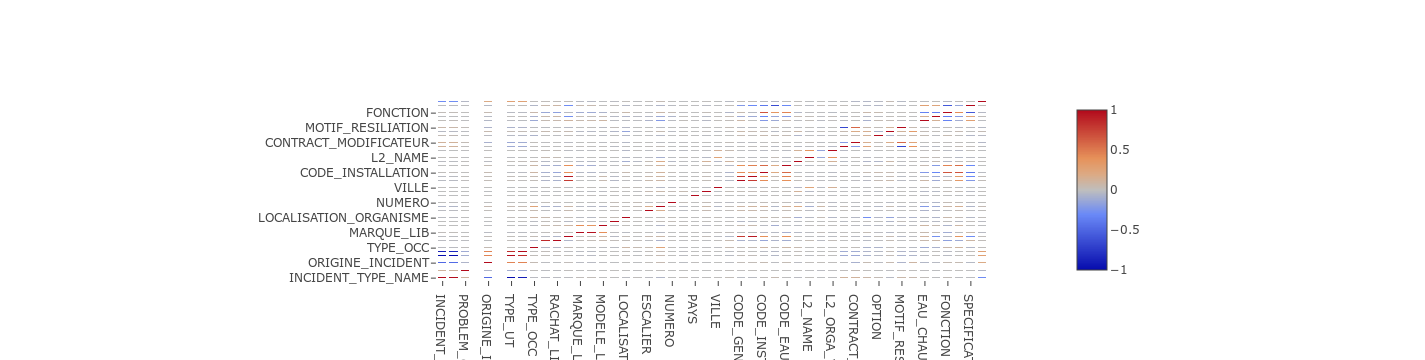

In [20]:
df_train[label_cols + ['target']].iplot.correlation_matrix()

## Timestamp Columns

In [8]:
df_train[timestamp_cols]

CRE_DATE CRE_DATE_GZL DATE_DEBUT   DATE_FIN DATE_RESILIATION  \
0     2014-11-09 08:38:01   2015-05-21 2015-01-14 2016-01-13              NaT   
1     2016-11-16 03:04:36   2017-07-31 2017-01-01 2017-12-31              NaT   
2     2016-09-06 11:14:40   2017-05-30 2016-10-01 2017-09-30              NaT   
3     2016-11-16 03:14:53   2016-12-23 2017-01-01 2017-12-31              NaT   
4     2016-11-16 02:15:28   2017-01-09 2017-01-20 2018-01-19              NaT   
...                   ...          ...        ...        ...              ...   
49995 2017-09-11 14:38:03   2017-10-19 2017-11-02 2018-11-01              NaT   
49996 2014-04-05 23:10:11   2014-06-16 2014-06-01 2015-05-31       2014-06-01   
49997 2015-05-27 14:20:59   2015-07-06 2015-07-01 2016-06-30              NaT   
49998 2016-04-10 00:06:04   2016-11-18 2016-06-12 2017-06-11              NaT   
49999 2016-02-06 07:24:06   2016-05-10 2016-04-15 2017-04-14              NaT   

      INSTALL_DATE RACHAT_DATE SCHEDULED_END_DATE SCHEDULED_START_DATE  \
0       2002-01-01         NaT         2015-05-21           2015-05-21   
1       2005-10-01         NaT         2017-10-16           2017-10-16   
2       1994-01-01  2014-11-21         2017-06-21           2017-06-21   
3       1991-05-01         NaT         2017-01-05           2017-01-05   
4       2016-01-20         NaT         2017-03-01           2017-03-01   
...            ...         ...                ...                  ...   
49995   1996-01-01         NaT         2017-11-14           2017-11-14   
49996   2011-06-01         NaT         2014-07-08           2014-07-08   
49997   2005-10-01         NaT         2015-10-01           2015-10-01   
49998   2004-06-12         NaT         2016-11-21           2016-11-21   
49999   2009-04-15         NaT         2016-05-26           2016-05-26   

                 UPD_DATE  
0     2015-04-19 08:29:30  
1     2017-01-01 04:48:14  
2     2016-10-01 09:34:45  
3     2016-11-17 12:19:40  
4     2016-11-17 12:26:46  
...                   ...  
49995 2017-09-12 01:55:17  
49996 2014-06-13 16:06:29  
49997 2015-07-01 04:42:00  
49998 2016-06-12 01:34:38  
49999 2016-04-15 05:06:09  

[50000 rows x 10 columns]

/home/gjeusel/src/plotlyink/plotlyink/register_pandas_accessors.py:8: UserWarning:

registration of accessor <class 'plotlyink.register_pandas_accessors.FrameIplotMethods'> under name 'iplot' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.



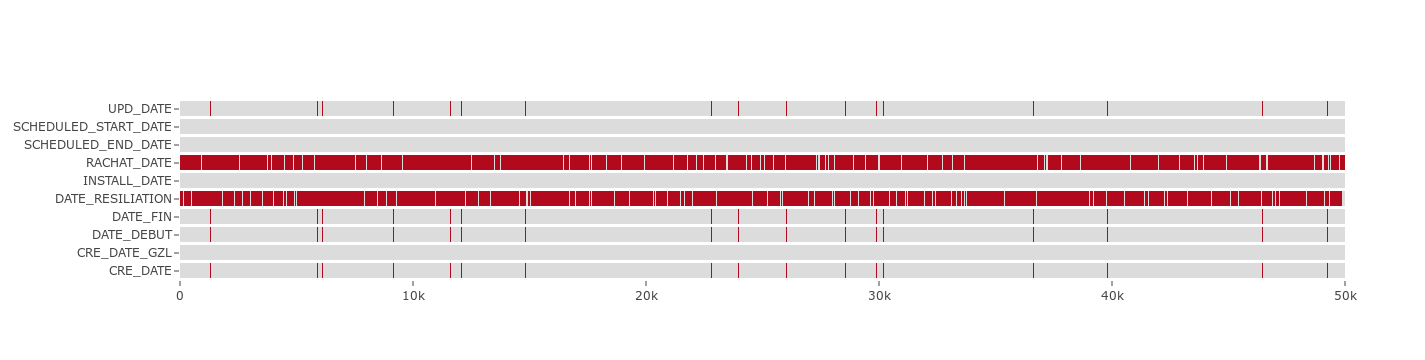

In [16]:
df_train[timestamp_cols].iplot.missing_values(layout={'margin': {'l': 180}})

In [10]:
# Traduce timestamp_cols into basic datetime features:
for col in timestamp_cols:
    df_train = datetime_features(df_train, col)

In [11]:
date_resiliation_cols = df_train.filter(regex='DATE_RESILIATION_').columns.tolist()

In [12]:
df_train[date_resiliation_cols].dropna().head()

DATE_RESILIATION_year  DATE_RESILIATION_month  DATE_RESILIATION_day  \
14                  2015.0                     9.0                  21.0   
25                  2016.0                    11.0                  30.0   
44                  2014.0                     7.0                   4.0   
88                  2016.0                     3.0                  21.0   
114                 2013.0                    10.0                  17.0   

     DATE_RESILIATION_dayofyear  DATE_RESILIATION_hour  \
14                        264.0                    0.0   
25                        335.0                    0.0   
44                        185.0                    0.0   
88                         81.0                    0.0   
114                       290.0                    0.0   

     DATE_RESILIATION_minute  DATE_RESILIATION_week  DATE_RESILIATION_weekday  
14                       0.0                   39.0                       0.0  
25                       0.0                   48.0                       2.0  
44                       0.0                   27.0                       4.0  
88                       0.0                   12.0                       0.0  
114                      0.0                   42.0                       3.0

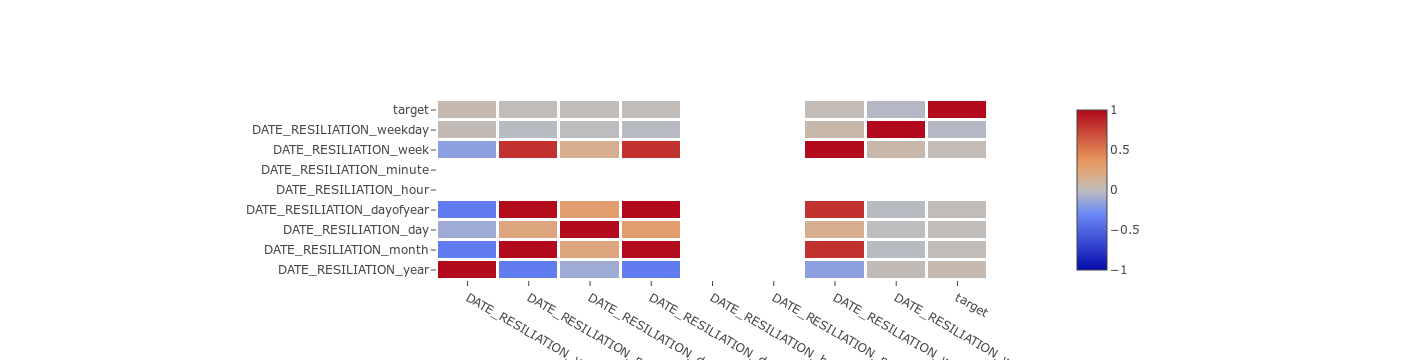

In [13]:
df_train[date_resiliation_cols + ['target']].dropna().iplot.correlation_matrix()

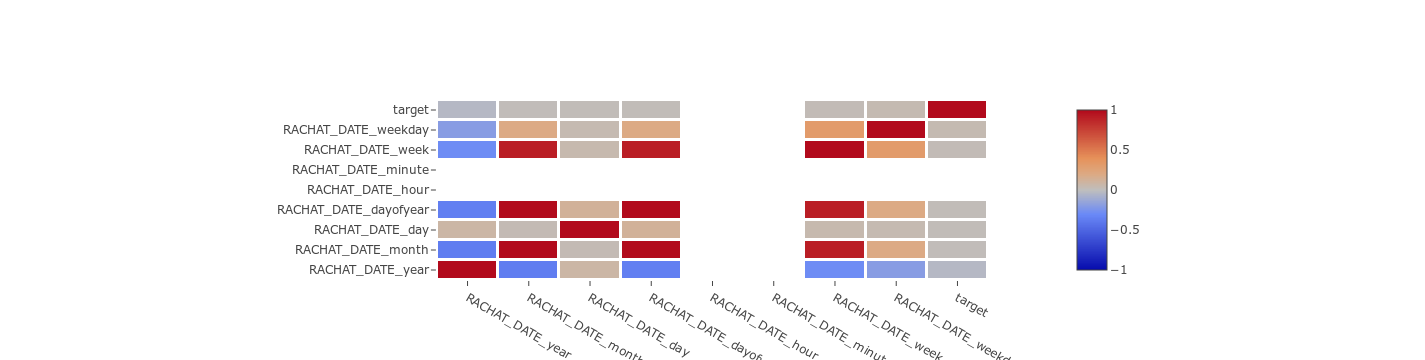

In [14]:
date_rachat_cols = df_train.filter(regex='RACHAT_DATE_').columns.tolist()
df_train[date_rachat_cols + ['target']].dropna().iplot.correlation_matrix()

Seems like it's better to drop those two columns with a poor correlation and a loot of missing values.

## Numeric Columns

In [17]:
df_train[numeric_cols]

INSTANCE_ID  INCIDENT_NUMBER  INCIDENT_TYPE_ID  NB_PASSAGE  MILLESIME  \
0          1898023         63354674             10003         1.0        NaN   
1            58331         86649824             10005         1.0     2017.0   
2         38023272         84986656             10005         1.0     2016.0   
3          6824822         80264428             10005         1.0     2017.0   
4         41063745         80766560             10005         1.0     2017.0   
...            ...              ...               ...         ...        ...   
49995      2403043         88822764             10005         1.0     2017.0   
49996     19858519         53494474             10005         1.0     2014.0   
49997      1219076         64699958             10005         1.0     2015.0   
49998     34066431         79044504             10003         1.0        NaN   
49999      1019175         73811368             10005         1.0     2016.0   

       AUTEUR_INCIDENT  RESOURCE_ID  LOCATION_ID  ORGANISATION_ID  \
0                 6078  100245045.0      8121172              908   
1                 3203  100016836.0      8098890             1745   
2                 6524  102703827.0      6693141              944   
3                 8028  100394083.0      8647240              896   
4                 3043  102586778.0      8289157              904   
...                ...          ...          ...              ...   
49995             7262  102780857.0      2671165              897   
49996             3005  100016816.0      4468519             1058   
49997            17467  100073905.0      8001968             1006   
49998            17084  100001492.0      5661684              992   
49999             2720  100059901.0      8391352             1033   

       PARTY_ID_OCC  MARQUE_CODE  CODE_POSTAL  POINTS_FIDEL  CODE_ENERGIE  \
0           2229862      10029.0        13320         250.0           3.0   
1             22411      10023.0        44110         900.0           1.0   
2          28464490      10078.0        62100         200.0           1.0   
3           3158642      10023.0        33620         500.0           1.0   
4            432518      10043.0        38070         100.0           1.0   
...             ...          ...          ...           ...           ...   
49995      25264877      10078.0        33138         500.0           1.0   
49996       5405115      10316.0        44119           0.0           5.0   
49997        530341      10032.0        53100         500.0           3.0   
49998      53625007      10043.0        38920         200.0           2.0   
49999       1130222      10023.0        69110         200.0           1.0   

       L1_ORGANISATION_ID  L2_ORGANISATION_ID  L2_ORGA_CODE_POSTAL     CIA  \
0                   776.0               908.0              13100.0  2118.0   
1                   780.0              1745.0              44220.0  2447.0   
2                   784.0               944.0              62137.0  2856.0   
3                   782.0               896.0              33270.0  2601.0   
4                   779.0               904.0              38300.0  2359.0   
...                   ...                 ...                  ...     ...   
49995               782.0               897.0              33700.0  2661.0   
49996               780.0              1058.0              44334.0  2441.0   
49997               780.0              1006.0              53000.0  2460.0   
49998               779.0               992.0              38120.0  2309.0   
49999               779.0              1033.0              69530.0  2330.0   

       ORGANISATION_CODE  CONTRACT_NUMBER  CONTRAT_TARIF  PRIX_FACTURE  \
0                  118.0        1468098.0          186.0         189.0   
1                  447.0          15101.0          251.0         242.0   
2                  856.0        2789967.0          247.0         139.0   
3                  601.0        1042317.0          113.0   

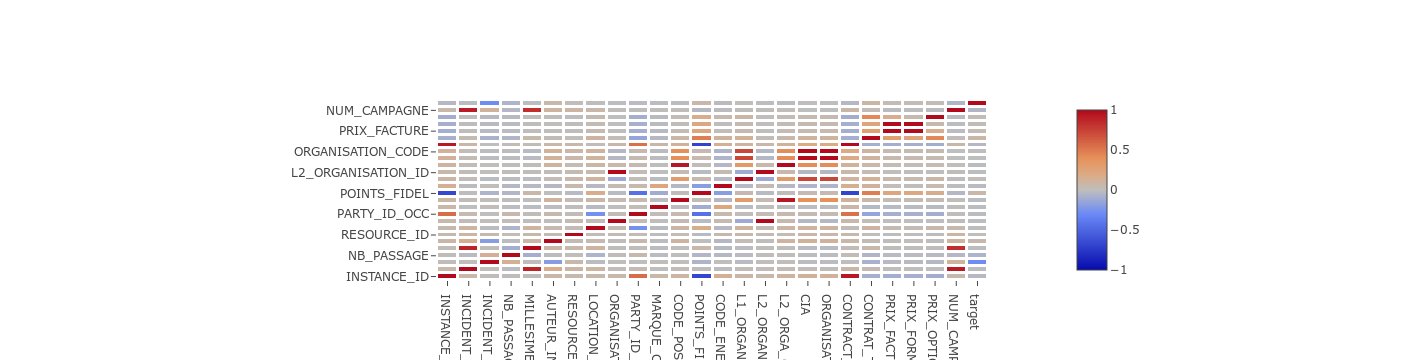

In [19]:
df_train[numeric_cols + ['target']].iplot.correlation_matrix()